Name:

Andrew ID:

Collaborators (if none, say "none"; do *not* leave this blank):

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

## Question 1: The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
########################################################################
######################### Write your code here #########################
import glob
corpus = ''
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename, encoding = "utf-8") as f:
        corpus += f.read()
########################################################################

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [3]:
########################################################################
######################### Write your code here #########################
import spacy
import re
from collections import Counter

nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
nlp.max_length = 70000000
doc = nlp(corpus)

histogram = Counter()
for token in doc:
    lemma = token.lemma_
    if re.match('[a-zA-Z]+$', lemma):
        histogram[lemma] += 1
########################################################################

In [4]:
########################################################################
######################### Write your code here #########################
import numpy as np

# convert histogram into two lists `lemmas_unsorted` and `counts_unsorted`
# where the i-th lemma in `lemmas_unsorted` has raw counts given by
# `counts_unsorted[i]`
lemmas_unsorted = []
counts_unsorted = []
for lemma, count in histogram.items():
    lemmas_unsorted.append(lemma)
    counts_unsorted.append(count)
counts_unsorted = np.array(counts_unsorted)  # to allow for fancy numpy indexing

# compute the indices that would sort the list `counts_unsorted` in
# decreasing order (which is why there's a "::-1")
sort_indices = np.argsort(counts_unsorted)[::-1]
sorted_counts = counts_unsorted[sort_indices]  # actually for later problem subparts

print('Rank'.ljust(5), 'Lemma'.ljust(10), 'Raw Count')
for rank, idx in enumerate(sort_indices[:50]):
    print(str(rank + 1).ljust(5), lemmas_unsorted[idx].ljust(10), counts_unsorted[idx])
########################################################################

Rank  Lemma      Raw Count
1     the        648221
2     be         427198
3     and        394399
4     of         378295
5     a          337297
6     to         314597
7     in         192739
8     I          188246
9     have       186525
10    that       161248
11    it         113563
12    not        109370
13    he         108068
14    his        103577
15    with       97311
16    you        96055
17    for        85044
18    my         67638
19    this       66436
20    her        66397
21    at         60422
22    on         59621
23    do         59514
24    him        58621
25    by         58315
26    say        57996
27    me         57913
28    which      57185
29    all        54975
30    but        54373
31    The        51617
32    much       49285
33    they       48283
34    from       47775
35    or         44776
36    will       43240
37    so         41933
38    can        41622
39    she        41240
40    And        40296
41    them       39321
42    man       

(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

Text(0, 0.5, 'Raw Count')

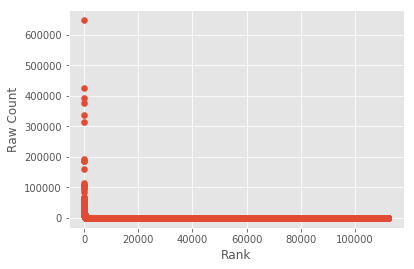

In [4]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # makes prettier plots

# Using Solution from part (b):
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')
########################################################################

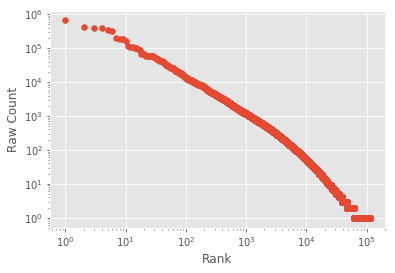

In [5]:
# Log-log plot
########################################################################
######################### Write your code here #########################
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')
axis = plt.gca()  # gets the current axis
axis.set_xscale('log')
axis.set_yscale('log')
########################################################################

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power law, i.e., the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 

**Answer:** The log-log plot of frequency and rank are fitted in a line with negative slope. It is consist with the power law, as the power law suggests $log(f(r)) = -clog(r)$, which is a line with slope of $-c$.

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [6]:
print('Probability of drawing one of the 4 most frequent words: ')
print(sorted_counts[:4].sum() / sorted_counts.sum())
print('Probability of drawing one of the 50 most frequent words: ')
print(sorted_counts[:50].sum() / sorted_counts.sum())

Probability of drawing one of the 4 most frequent words: 
0.15296304744676584
Probability of drawing one of the 50 most frequent words: 
0.45646911361678544


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [7]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
print((sorted_counts == 1).sum() / len(sorted_counts))
########################################################################
print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
print((sorted_counts < 10).sum() / len(sorted_counts))
########################################################################

Occur only once: 
0.44965528298861634
Occur fewer than 10 times: 
0.7852689148985446


## Question 2: Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [3]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/ReverieHome/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

([<matplotlib.axis.YTick at 0x1325acfd0>,
 <a list of 18 Text yticklabel objects>)

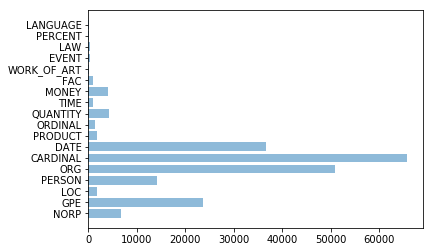

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
########################################################################
######################### Write your code here #########################
for article in reuters_nlp:
    label_list = [ent.label_ for ent in article.ents]
    label_counter.update(label_list)
labels = [item[0] for item in label_counter.items()]
label_occurrences = [item[1] for item in label_counter.items()]
y_pos = range(len(labels))
plt.barh(y_pos, label_occurrences, align='center', alpha=0.5)
plt.yticks(y_pos, labels)
########################################################################

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurrence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [13]:
########################################################################
######################### Write your code here #########################
common_org = Counter()
common_gpe = Counter()

for article in reuters_nlp:
    org_list = set([ent.lemma_ for ent in article.ents if ent.label_ == "ORG"])
    gpe_list = set([ent.lemma_ for ent in article.ents if ent.label_ == "GPE"])
    
    # for counting total number of times entities occur and not just whether they occured in the article or not:
    # org_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"ORG"]
    # gpe_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"GPE"]
    common_org.update(org_list)
    common_gpe.update(gpe_list)

print('Most frequently occurring organizations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_org.most_common(10)]))

print()

print('Most frequently occurring locations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_gpe.most_common(10)]))
########################################################################

Most frequently occurring organizations:
  Avg: 583
  Reuters: 445
  the Securities and Exchange Commission: 244
  EC: 240
  USDA: 226
  NET: 203
  Treasury: 157
  FED: 141
  Congress: 138
  Fed: 135

Most frequently occurring locations:
  U.S.: 1666
  Shr: 690
  Japan: 536
  the United States: 345
  U.K.: 309
  New York: 267
  Canada: 243
  Washington: 239
  West Germany: 232
  JAPAN: 221


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

**Solution note:** For a specific `GPE` entity $x$, we have

$$\text{PMI}(\text{opec}, x)
= \log\frac{P(\text{opec}, x)}{P(\text{opec})P(x)}
= \log\frac{\frac{\text{# articles opec and }x\text{ are both in}}{\text{total # articles}}}{P(\text{opec})\frac{\text{# articles }x\text{ is in}}{\text{total # articles}}}
= \log\frac{\text{# articles opec and }x\text{ are both in}}{P(\text{opec})(\text{# articles }x\text{ is in})}\,.$$

For different values of $x$, $P(\text{opec})$ is a constant! This means that in terms of ordering the different $x$'s by PMI, we do not need to compute $P(\text{opec})$. Moreover, whether we take the logarithm or not also doesn't affect the ordering of the $x$'s according to PMI. Thus, for each $x$, it suffices to compute the fraction

$$\frac{\text{# articles opec and }x\text{ are both in}}{\text{# articles }x\text{ is in}}\,.$$

By sorting the $x$'s according to this fraction, we get the same ordering as if we sorted the $x$'s according to PMI.

In [22]:
########################################################################
######################### Write your code here #########################
co_occurrence = Counter()
gpe_counts = Counter()

for article in reuters_nlp:
    article_gpe = set([ent.lemma_ for ent in article.ents if ent.label_ == u'GPE'])
    article_org = set([ent.lemma_ for ent in article.ents if ent.label_ == u'ORG'])
    gpe_counts.update(article_gpe)
    if u'OPEC' in article_org:
        co_occurrence.update(article_gpe)

part_of_pmi = Counter()
for gpe, co_count in co_occurrence.items():
    part_of_pmi[gpe] = co_count / gpe_counts[gpe]
    
print('Rank'.ljust(5), 'Location'.ljust(30), 'Co-occurrence Count'.ljust(20), 'Occurrence Count'.ljust(20))

for i, w in enumerate(sorted(part_of_pmi,
                             key=part_of_pmi.get,
                             reverse=True)[:50]):
    print(str(i+1).ljust(5), w.ljust(30), str(co_occurrence[w]).ljust(20), str(gpe_counts[w]).ljust(20))
########################################################################

Rank  Location                       Co-occurrence Count  Occurrence Count    
1     The United States '            1                    1                   
2     Lichtblau                      1                    1                   
3     Minas                          1                    1                   
4     Duri                           1                    1                   
5     Sulphur                        1                    1                   
6     I.E.                           1                    1                   
7     L.F.                           1                    1                   
8     Emirates                       2                    2                   
9     the Lake Charles               1                    1                   
10    Bethesda                       1                    1                   
11    Easter                         1                    1                   
12    Gabon on Africa have           1              

Your text answer (for this question, your answer is *not* code): 

**Answer:** Entities such as 'dubai' and 'qatar' were expected to have highest ranks since they are directly related to OPEC. However, in the result, somewhat meaningless entities have highest PMI values. This might be due to several reasons. First, the entity recognition labeling of spaCy is imperfect. Second, the number of documents (here, newspaper articles) might have been too small. Third, result reflects the nature of PMI, which gives high scores to rare words.